# Instability of estimates

Whenever we consider a set of observations, our calculation of a parameter can only be an estimate. It will change as we take more measurements or as time passes and we get new observations. We can quantify the uncertainty in our estimate by looking at how the parameter changes as we look at different subsets of the data. For instance, standard deviation describes how different the mean of a set is from the mean of each observation, that is, from each observation itself. In financial applications, data often comes in time series. In this case, we can estimate a parameter at different points in time; say, for the previous 30 days. By looking at how much this moving estimate fluctuates as we change our time window, we can compute the instability of the estimated parameter.

The standard deviation in this case is about a quarter of the range, so this data is extremely volatile. Taking this into account when looking ahead gave a better prediction than just using the mean, although we still observed data more than one standard deviation away. We could also compute the rolling mean of the Sharpe ratio to try and follow trends; but in that case, too, we should keep in mind the standard deviation.

# Example: Moving Average

Let's say you take the average with a lookback window; how would you determine the standard error on that estimate? Let's start with an example showing a 90-day moving average.

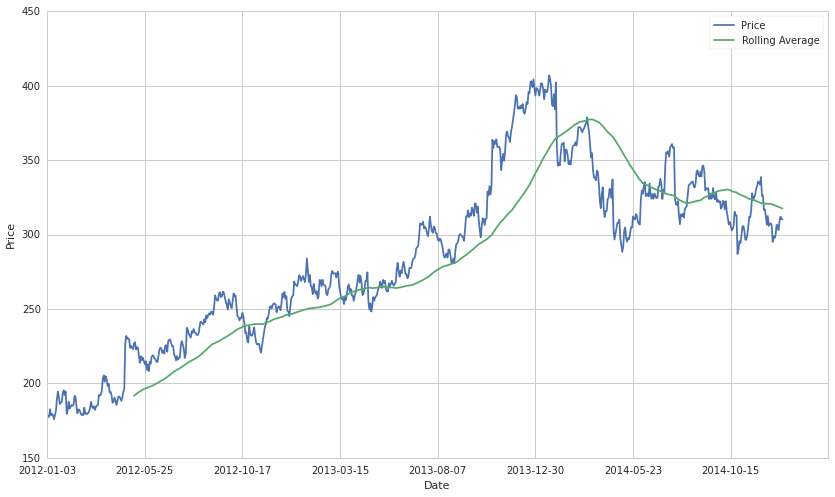

In [9]:
# Load time series of prices
start = '2012-01-01'
end = '2015-01-01'
pricing = get_pricing('AMZN', fields='price', start_date=start, end_date=end)

# Compute the rolling mean for each day
mu = pd.rolling_mean(pricing, window=90)

# Plot pricing data
_, ax1 = plt.subplots()
ax1.plot(pricing) 
ticks = ax1.get_xticks()
ax1.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.ylabel('Price')
plt.xlabel('Date')

# Plot rolling mean
ax1.plot(mu);
plt.legend(['Price','Rolling Average']);

To see what this changing standard deviation means for our data set, let's plot the data again along with the Bollinger bands: the rolling mean, one rolling standard deviation (of the data) above the mean, and one standard deviation below.

Note that although standard deviations give us more information about the spread of the data, we cannot assign precise probabilities to our expectations for future observations without assuming a particular distribution for the underlying process.

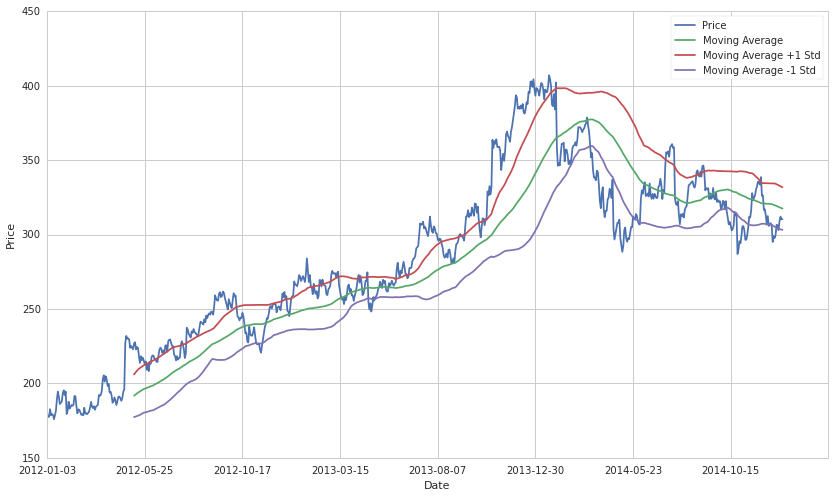

In [12]:
# Plot original data
_, ax3 = plt.subplots()
ax3.plot(pricing)
ax3.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates

# Plot Bollinger bands
ax3.plot(mu)
ax3.plot(mu + std)
ax3.plot(mu - std);
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['Price', 'Moving Average', 'Moving Average +1 Std', 'Moving Average -1 Std'])

Observe how rolling mean reduces the volatility of the minute data, when rolling mean of price for 5 hr with a window of 15 min is computed.

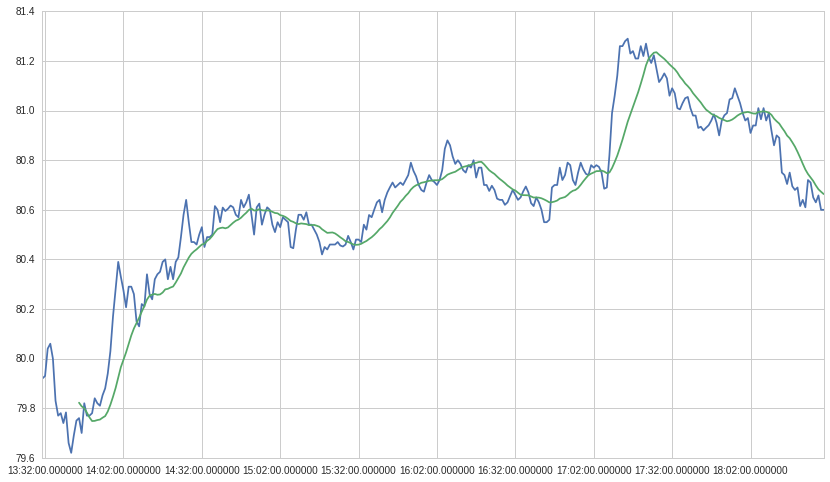

In [20]:
start = '2015-06-02'
end = '2016-01-01'
freq = 'minute'

price = get_pricing('FB', start_date=start ,end_date=end ,frequency=freq, fields=['price'])[:300]
rolling_price = price.rolling(15).mean()
plt.plot(price)
plt.plot(rolling_price)

# Conclusion

Whenever we compute a parameter for a data set, we should also compute its volatility. Otherwise, we do not know whether or not we should expect new data points to be aligned with this parameter. A good way of computing volatility is dividing the data into subsets and estimating the parameter from each one, then finding the variability among the results. There may still be outside factors which are introduced after our sample period and which we cannot predict. However, the instability analysis and testing for standard error is still very useful for telling us how much we should distrust our estimates.